In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Generate the data-
N = 50
X = np.linspace(0, 10, N)  # 50 evenly spaced points between 0 and 10
Y = 0.5*X + np.random.randn(N)  # scalar times x plus and random noise

# Let's create some outliers-
Y[-1] += 30  # last point, add 30 to make it an Outlier
Y[-2] += 30 # same as above

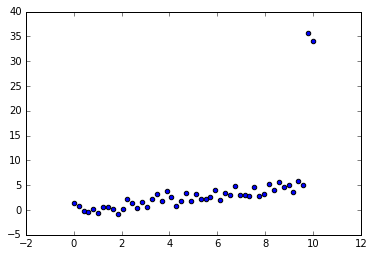

In [17]:
plt.scatter(X, Y)
plt.show()

In [18]:
# Now let's solve for the best weights-
X = np.vstack([np.ones(N), X]).T  # adding the bias term 1 and rearranging the data
X[0:3]

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.20408163],
       [ 1.        ,  0.40816327]])

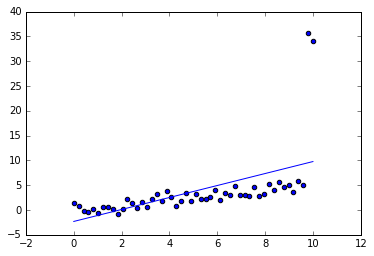

In [25]:
# First we will calculate the maximum likelihood solution-
w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Yhat_ml = X.dot(w_ml)
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], Yhat_ml)
plt.show()

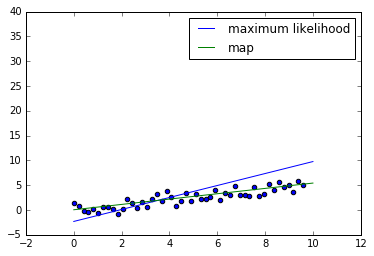

In [26]:
# Now we will do the L-2 norm (Ridge Regresison)
# i.e. w = (lambdaI + X.TX)inverse(X.TY)

l2 = 1000.0 # let's set the l2 penalty to 1000.0
w_map = np.linalg.solve(l2*np.eye(2) + X.T.dot(X), X.T.dot(Y))
Yhat_map = X.dot(w_map)
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], Yhat_ml, label = 'maximum likelihood')
plt.plot(X[:, 1], Yhat_map, label = 'map')
plt.legend()
plt.show()

In [ ]:
# So, we can see that the L2 regularization has a better fit.